In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from ucimlrepo import fetch_ucirepo
from typing import Tuple, List, Dict

#### 5.2

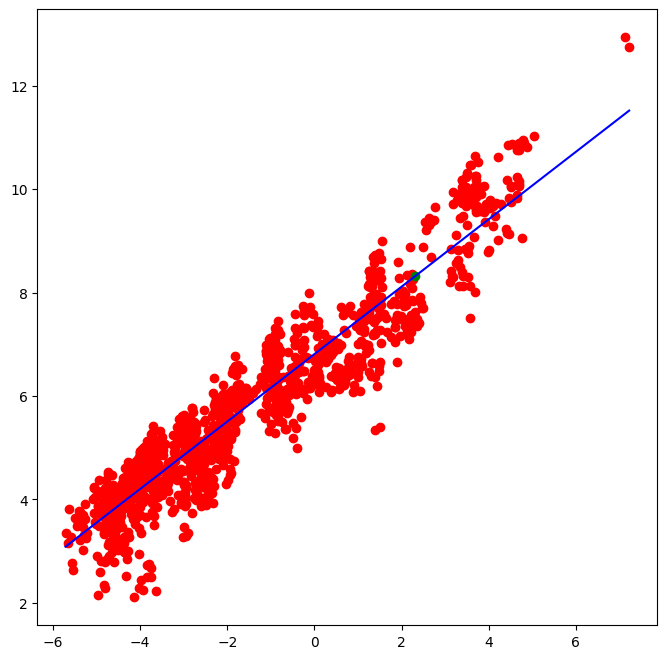

In [46]:
def adjustData(
    x: np.array,
    y: np.array
) -> Tuple[np.array, np.array]:
    N = x.shape[0]
    P = x.shape[1]
    ones = np.ones(P)
    return np.array([ones, np.log(x[0])]), np.log(y[0])

def least_squares_cost(
    x: np.array,
    y: np.array,
    w: np.array
) -> float:
    N = x.shape[0]
    P = x.shape[1]
    cost = 0
    for p in range(P):
        x_p = x[:, p]
        y_p = y[p]
        cost += (np.dot(x_p, w) - y_p) ** 2
    return cost / P

def least_squares_cost_gradient(
    x: np.array,
    y: np.array,
    w: np.array
) -> float:
    N = x.shape[0]
    P = x.shape[1]
    grad = np.zeros(N)
    for p in range(P):
        x_p = x[:, p]
        y_p = y[p]
        grad += (np.dot(x_p, w) - y_p) * x_p
    return 2 * grad / P

def gradiente_descendente_LOC(
    x: np.array,
    y: np.array,
    w: np.array,
    max_its: int = 1000,
    alpha: float = 10
):
    historic_w = [w]
    historic_cost = [least_squares_cost(x, y, w)]
    for _ in range(max_its):
        grad_eval = least_squares_cost_gradient(x, y, w)
        pre_otmization_cost = least_squares_cost(x, y, w)
        pre_otmization_w = w
        w = w - alpha * grad_eval 
        pos_otmization_cost = least_squares_cost(x, y, w)
        historic_w.append(w)
        if pos_otmization_cost > pre_otmization_cost:
            w = pre_otmization_w
            alpha /= 2
            cost = pre_otmization_cost
        else:
            cost = pos_otmization_cost
        # print("w: {}\nCost: {}".format(w, cost))

    return w, historic_w, historic_cost

# import the dataset
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
X = data[:-1,:]
Y = data[-1:,:]
X, Y = adjustData(X, Y)
N = X.shape[0]
P = X.shape[1]

w = np.zeros(N)
iterations = 100

last_w, historic_w, historic_cost = gradiente_descendente_LOC(X, Y, w, iterations, 0.1)

plt.figure(figsize=(8, 8))
plt.scatter(
    X[1, :],
    Y,
    c = 'red'
)

new_x = np.log(10)
y_hat = last_w[0] + new_x * last_w[1]

plt.scatter(
    [new_x],
    [y_hat],
    c = 'green'
)

x_points = np.sort(X[1,:])
x_plot = np.linspace(x_points[0], x_points[P-1], 1000)
y_plot = last_w[0] + x_plot * last_w[1] # vai resultar em um vetor onde foram aplicados os coeficientes
plt.plot(x_plot, y_plot, 'b')
plt.show()


#### 5.6

LAD Cost: 0.4421958421354149
LOC Cost: 35.25945374465986


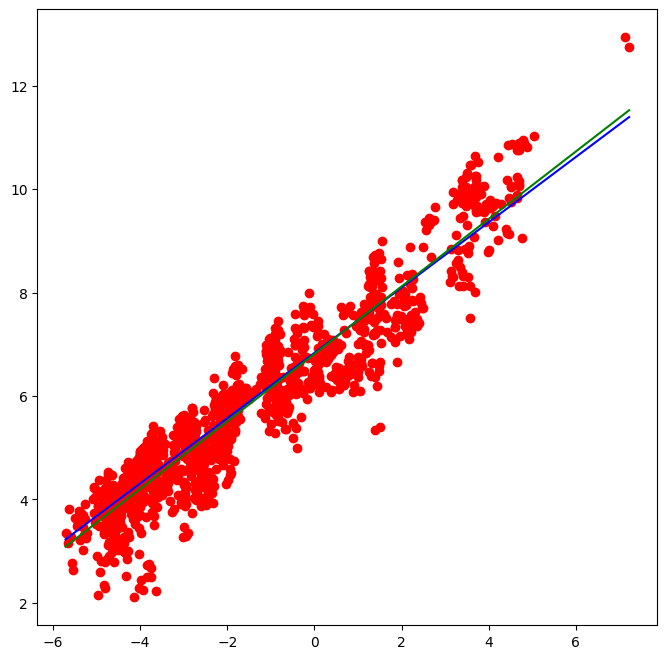

In [44]:
def least_absolute_deviations_gradient(
    x: np.array,
    y: np.array,
    w: np.array
) -> float:
    N = x.shape[0]
    P = x.shape[1]
    grad = np.zeros(N)
    for p in range(P):
        x_p = x[:, p]
        y_p = y[p]
        model = np.dot(x_p, w)
        if model >= y_p:
            c = x_p
        else:
            c = -x_p
        grad += c
    return grad / P

def least_absolute_deviations_cost(
    x: np.array,
    y: np.array,
    w: np.array
) -> float:
    N = x.shape[0]
    P = x.shape[1]
    grad = 0
    for p in range(P):
        x_p = x[:, p]
        y_p = y[p]
        grad += abs(np.dot(x_p, w) - y_p)
    return grad / P

def gradiente_descendente_LAD(
    x: np.array,
    y: np.array,
    w: np.array,
    max_its: int = 1000,
    alpha: float = 10
):
    historic_w = [w]
    historic_cost = [least_absolute_deviations_cost(x, y, w)]
    for _ in range(max_its):
        grad_eval = least_absolute_deviations_gradient(x, y, w)
        pre_otmization_cost = least_absolute_deviations_cost(x, y, w)
        pre_otmization_w = w
        w = w - alpha * grad_eval 
        pos_otmization_cost = least_absolute_deviations_cost(x, y, w)
        historic_w.append(w)
        if pos_otmization_cost > pre_otmization_cost:
            w = pre_otmization_w
            alpha /= 2
            cost = pre_otmization_cost
        else:
            cost = pos_otmization_cost
        historic_cost.append(cost)
        # print("w: {}\nCost: {}".format(w, cost))

    return w, historic_w, historic_cost



# import the dataset
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
X = data[:-1,:]
Y = data[-1:,:]
X, Y = adjustData(X, Y)
N = X.shape[0]
P = X.shape[1]

w = np.zeros(N)
iterations = 1000

last_w_LAD, historic_w_LAD, historic_cost_LAD = gradiente_descendente_LAD(X, Y, w, iterations, 0.1)
last_w_LOC, historic_w_LOC, historic_cost_LOC = gradiente_descendente_LOC(X, Y, w, iterations, 0.1)


print("LAD Cost: {}\nLOC Cost: {}".format(historic_cost_LAD[-1], historic_cost_LOC[-1]))

# Plota os pontos dados
plt.figure(figsize=(8, 8))
plt.scatter(X[1, :],Y,c = 'red')

# Ordena os inputs
x_points = np.sort(X[1,:])

# LAD
x_plot_LAD = np.linspace(x_points[0], x_points[P-1], 1000)
y_plot_LAD = last_w_LAD[0] + x_plot_LAD * last_w_LAD[1] # vai resultar em um vetor onde foram aplicados os coeficientes
plt.plot(x_plot_LAD, y_plot_LAD, 'blue')

# LOC
x_plot_LOC = np.linspace(x_points[0], x_points[P-1], 1000)
y_plot_LOC = last_w_LOC[0] + x_plot_LOC * last_w_LOC[1] # vai resultar em um vetor onde foram aplicados os coeficientes
plt.plot(x_plot_LOC, y_plot_LOC, 'green')

plt.show()

#### 5.11

In [56]:
def adjustData(
    x: np.array,
    y: np.array
) -> Tuple[np.array, np.array]:
    N = x.shape[0]
    P = x.shape[1]
    ones = np.ones(P)
    return np.array([ones, x[0,:], x[1,:]]), y

def least_squares_cost_multi(
    x: np.array,
    y: np.array,
    w: np.array
):
    N = x.shape[0]
    P = x.shape[1]
    cost = 0
    for p in range(P):
        x_p = x[:,p]
        y_p = y[:,p]
        cost += np.linalg.norm((np.matmul(x_p, w) - y_p))
    return cost / P

def least_squares_grad_multi(
    x: np.array,
    y: np.array,
    w: np.array
):
    N = x.shape[0]
    P = x.shape[1]
    grad = np.zeros(N)
    for p in range(P):
        x_p = x[:, p]
        y_p = y[p]
        grad += (np.dot(x_p, w) - y_p) * x_p
    return 2 * grad / P

# load in data
csvname = 'linear_2output_regression.csv'
data = np.loadtxt(csvname,delimiter=',')
X = data[:2,:]
Y = data[2:,:]

X, Y = adjustData(X, Y)

N = X.shape[0]
P = X.shape[1]
C = Y.shape[0]

print("N:", N)
print("P:", P)
print("C:", C)

W = []

for c in range(C):
    W.append(np.ones(N))

W = np.array(W).T

# print(X)
# print(Y)
# print(W)

print(least_squares_cost_multi(X, Y, W))

N: 3
P: 100
C: 2
2.099965710986825
